<a href="https://colab.research.google.com/github/antonio2505/Data_Science_Business_CS/blob/main/House_Prices_Prediction_Using_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CODE TO PREDICT HOUSE PRICES USING ANNs (REGRESSION TASK)
# Mr. Kassi Antoine

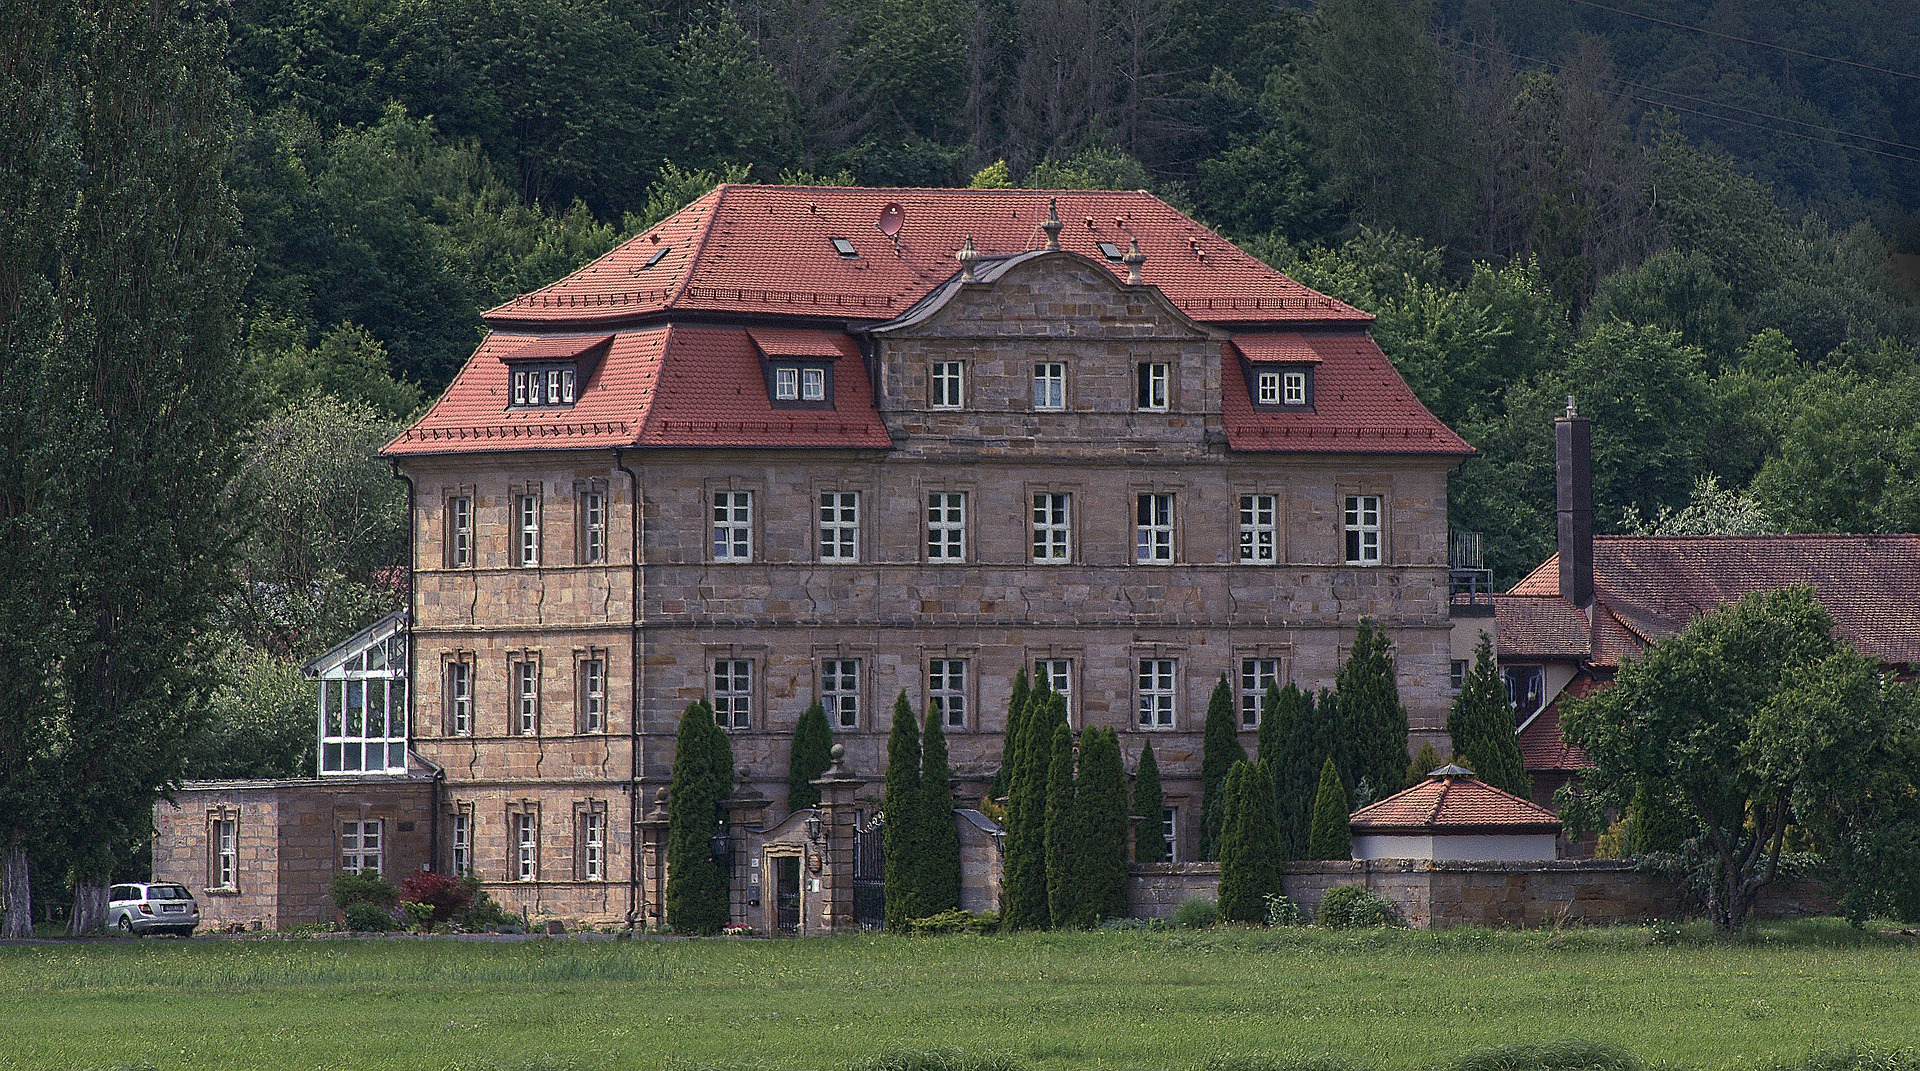


# PROBLEM STATEMENT

- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.
- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)

# STEP #0: LIBRARIES IMPORT


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [ ]:
from google.colab import files
file = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [ ]:
house_df = pd.read_csv('kc_house_data.csv')

In [ ]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
house_df[house_df['price']==7700000.0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


# STEP #2: VISUALIZE DATASET

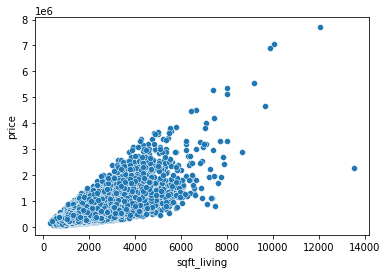

In [ ]:
# let's the relationship between the square foot living
sns.scatterplot(x= 'sqft_living', y = 'price', data= house_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34e44a3810>,
      dtype=object)

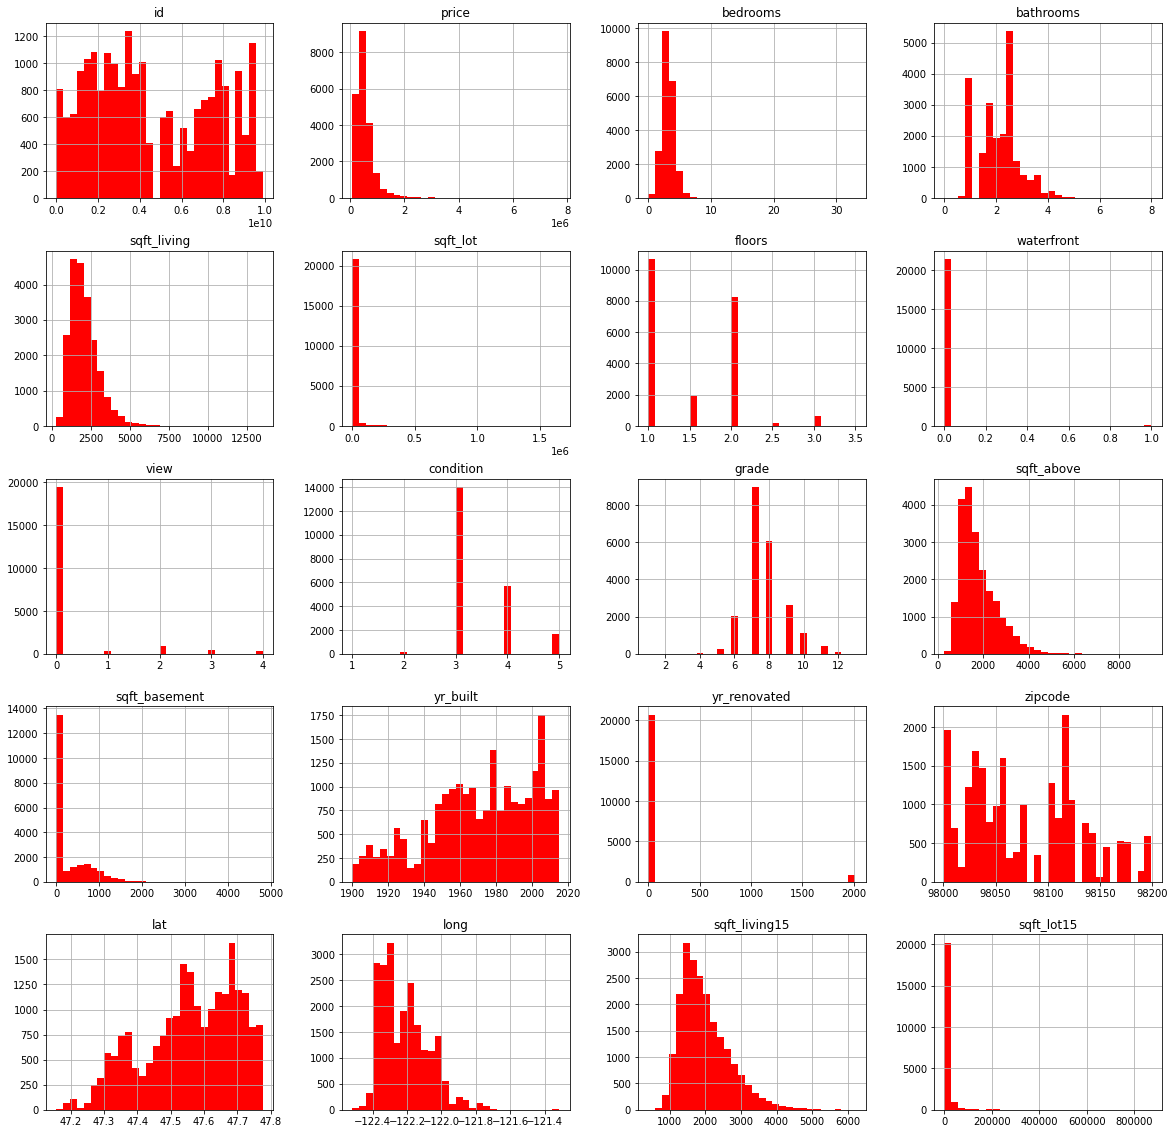

In [ ]:
house_df.hist(bins= 30, figsize=(20,20), color = 'r')

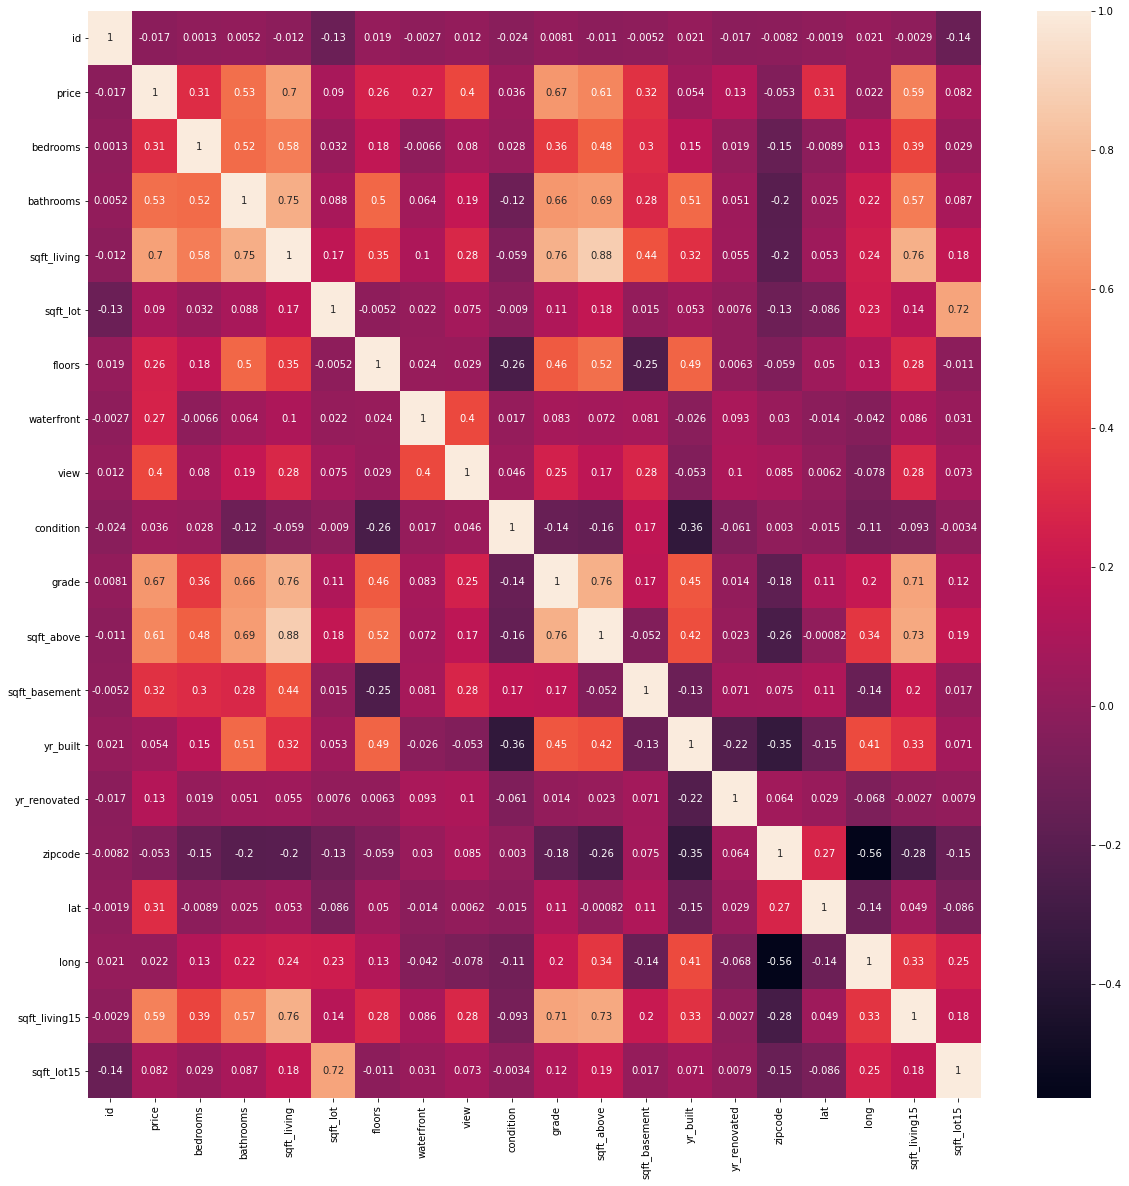

In [ ]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(house_df.corr(), annot=True)

In [ ]:
#sns.pairplot(house_df)

In [ ]:
house_df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [ ]:
house_df_sample = house_df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built']]

In [ ]:
house_df_sample.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1180,0,1955
1,538000.0,3,2.25,2570,7242,2170,400,1951
2,180000.0,2,1.00,770,10000,770,0,1933
3,604000.0,4,3.00,1960,5000,1050,910,1965
4,510000.0,3,2.00,1680,8080,1680,0,1987


In [ ]:
sns.pairplot(house_df_sample)

In [ ]:
house_df.head(2)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [ ]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']
selected_features

In [ ]:
x = house_df[selected_features]
x

In [ ]:
y = house_df['price']
y

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

In [ ]:
#the max of every single column we have
scaler.data_max_

In [ ]:
#the min of every single column we have
scaler.data_min_

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y_scaled = scaler.transform(y)

In [ ]:
y_scaled

# STEP#4: TRAINING THE MODEL

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size =0.25)

In [ ]:
x_train.shape

In [ ]:
y_test.shape

In [ ]:
x_test.shape

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim = 7, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= 'Adam', loss= 'mean_squared_error')

In [ ]:
#let's fit the model
epochs_hist = model.fit(x_train, y_train, epochs = 100, batch_size =50, validation_split=0.2)

# STEP#5: EVALUATING THE MODEL 

In [ ]:
epochs_hist.history.keys()

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
x_test_1 = np.array([[4,3,1960,5000,1,2000,3000]])

scaler_1  = MinMaxScaler()
#scaler_1.fit_transform(x_test_1)

y_pred_1 = model.predict(scaler_1.fit_transform(x_test_1))
y_pred_1

In [ ]:
#Evaluate the model  ====>> the model is not more better
y_pred = model.predict(x_test)
plt.plot(y_test, y_pred, '^', color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')

In [ ]:
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

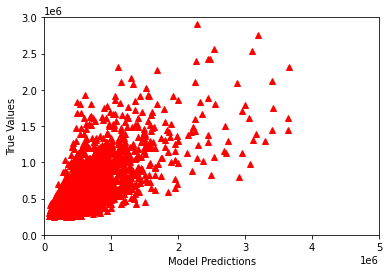

In [ ]:
plt.plot(y_test_original, y_pred_original, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [ ]:
k = x_test.shape[1]
n = len(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_pred_original)),'.3f'))
MSE = mean_squared_error(y_test_original, y_pred_original)
MAE = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 245197.55 
MSE = 60121838314.7765 
MAE = 155863.69656157476 
R2 = 0.5618744981356675 
Adjusted R2 = 0.5613061366617886


# MULTIPLE LINEAR REGRESSION 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

Linear Model Coeff (m) [[-6.33357437e+04  8.07248163e+03  2.15072167e+02 -3.38314024e-01
   1.32151505e+04  9.01911516e+01  1.24881016e+02]]
Linear Model Coeff (b) [77542.07940554]


In [ ]:
y_predict = regressor.predict(X_test)

(0.0, 3000000.0)

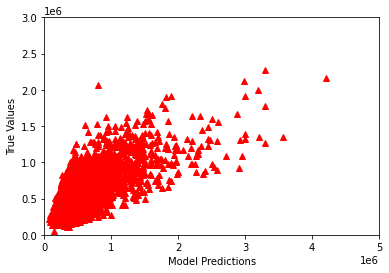

In [ ]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [ ]:
k = x_test.shape[1]
n = len(x_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 257300.949 
MSE = 66203778232.95721 
MAE = 169228.07787006994 
R2 = 0.5071638255033972 
Adjusted R2 = 0.5065244902140207


# LET'S INCREASE THE NUMBER OF FEATURES (INDEPENDANT VARIABLES)

In [ ]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
y = house_df['price']

In [ ]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [ ]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim = 19, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0021 - val_loss: 7.5493e-04
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 6.3073e-04 - val_loss: 6.3268e-04
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 5.3936e-04 - val_loss: 6.2281e-04
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 5.3438e-04 - val_loss: 6.5012e-04
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 4.7836e-04 - val_loss: 5.5756e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 4.9231e-04 - val_loss: 4.9160e-04
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 4.4328e-04 - val_loss: 4.6238e-04
Epoch 8/100
260/260 [==============================] - 0s 2ms/step - loss: 4.2954e-04 - val_loss: 4.7689e-04
Epoch 9/100
260/260 [==============================] - 0s 2ms/step - loss: 4.1094e-04 - val_loss: 4.8893e-04
Epoch 10/100
260/260 [=

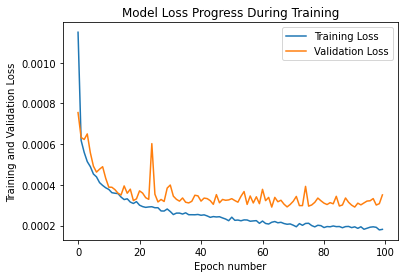

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

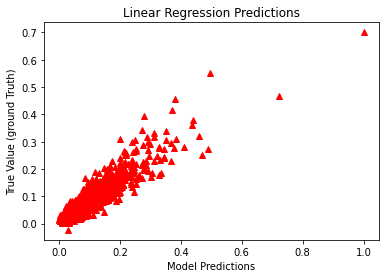

In [ ]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [ ]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 139076.913 
MSE = 19342387862.84723 
MAE = 82523.77936626805 
R2 = 0.8607073264115219 
Adjusted R2 = 0.860526627983961


# EXCELLENT JOB! NOW YOU'VE MASTERED ANNs TO PERFORM REGRESSION TASKS!